# Implementation of the Cyberemotions agent-based modeling framework

In [1]:
import model as cyberemotions

## Documentation of model test runs

This is the first documentation of multiple test runs of the implemented Cyberemotions model. Every model was run using only one agent instance, investigating if the agent state variables respond to stimulus as described by the Cyberemotions framework. Because there are no other agents present in the simulation, the stimulus was artificially created by hardcoding the communication of agent emotions at arbitrarily set time steps. This way, the emotional charge of the field changes at these given points in time, in turn affecting the simulated agent.

Each model run produces three outputs, namely visualizations of the history of the state variables (1) valence and (2) arousal of the agent, and (3) the emotional charge of the field.

### Model settings

The standard model parameters, unless otherwise specified, are as follows:

| Parameter | Short | Value | Constant
|---|---|---|---|
| Valence baseline | b | 0.056 | VALENCE_B |
| Arousal baseline | d | -0.442 | AROUSAL_B |
| Valence decay | &gamma;<sub>v</sub> | 0.367 | VALENCE_DECAY |
| Arousal decay | &gamma;<sub>a</sub> | 0.414 | AROUSAL_DECAY |
| Amplitudes | A<sub>v</sub> | 0.3 | VALENCE_AMP |
|| A<sub>a</sub> | 0.3 | AROUSAL_AMP |
| Arousal threshold | &tau; | 0 | AR_THRESHOLD |
| Down-regulation factor | k<sub>v</sub> | 0.38 | VALENCE_K |
|| k<sub>a</sub> | 0.45 | AROUSAL_K |
| Valence coefficients | b<sub>0</sub> | 0.14 | COEFF_B0 |
|| b<sub>1</sub> | 0 | COEFF_B1 |
|| b<sub>2</sub> | 0.057 | COEFF_B2 |
|| b<sub>3</sub> | -0.047 | COEFF_B3 |
| Arousal coefficients | d<sub>0</sub> | 0.178 | COEFF_D0 |
|| d<sub>1</sub> | 0.14469 | COEFF_D1 |
|| d<sub>2</sub> | 0 | COEFF_D2 |
|| d<sub>3</sub> | 0 | COEFF_D3 |
| Field charge | h | 0 | FIELD_H |
| Field decay | &gamma;<sub>h</sub> | 0.7 | FIELD_DECAY |
| Field impact | s | 0.1 | FIELD_IMPACT |

### Model runs

The function `start_simulation()` of the `cyberemotions` module starts the simulation and takes the following arguments as inputs:
1. Number of time stops the model goes through (standard `30`)
1. Boolean value of whether stochastic factors are included in the model  (`True` or `False`)
1. Boolean value of whether the agent is capable of expressing its emotions to the field or not (`True` or `False`)
1. Three lists of numbers of positive and negative expressions of emotions at time step 0, time step 10, and time step 20 (eg. `[30,20]` meaning 30 positive and 20 negative expressions, or can be `None`)

#### #00: No expression, no stochasticity, no stimuli

The first run excludes stochastic factors and the agent potentially expressing its emotions to the field. It also provides no input to the field, leaving it at its baseline.

Setting the valence and arousal state variables of the agent to an arbitrary value, it illustrates the decay of valence and arousal over time towards their respective baselines.

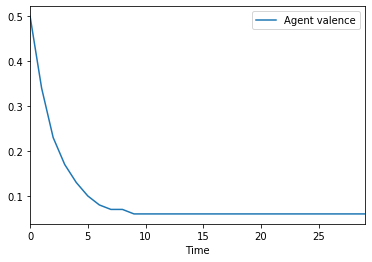

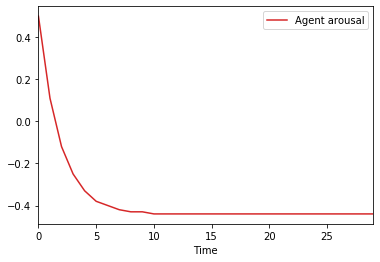

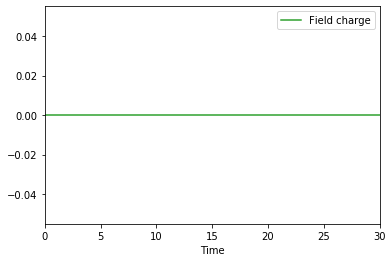

In [3]:
cyberemotions.VALENCE_START = 0.5
cyberemotions.AROUSAL_START = 0.5

cyberemotions.start_simulation(30,False,False,None,None)

#### #01: Expression, no stochasticity, no stimuli

The next run allows the agent to express its emotions when the set arousal is bigger than its arousal threshold, illustrating the sharper decrease in valence and arousal after an expression of emotions, compared to the regular decay.

It also shows the effect of the agent expression on the charge of the field. In turn, the now charged field has no significant effect on the agent because one expression alone cannot charge the field to provide meaningful feedback (at least without additional components eg. stochastic factors).

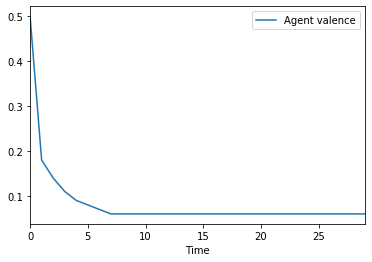

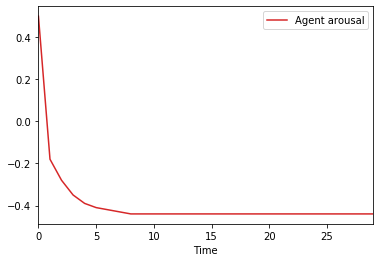

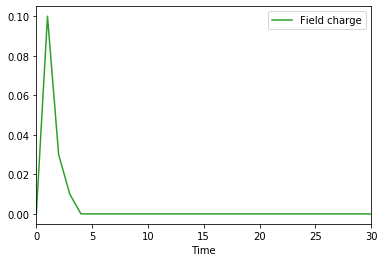

In [4]:
cyberemotions.start_simulation(30,True,False,None,None)

#### #02: No expression, no stochasticity, positive initial stimulus

Using the valence and arousal baselines as starting points, this run again excludes stochastic factors and the agent potentially expressing its emotions to the field. At the first time step there is artificial input into the field (35 expressions of positive emotions, 15 expressions of negative emotions) that changes its emotional charge. This positive field charge also increases valence and arousal in the agent. After this increase, all three variables (valence, arousal, field charge) regress towards their respective baselines.

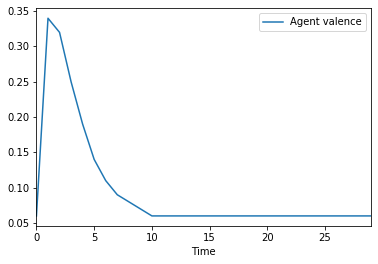

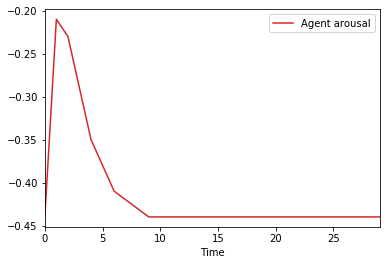

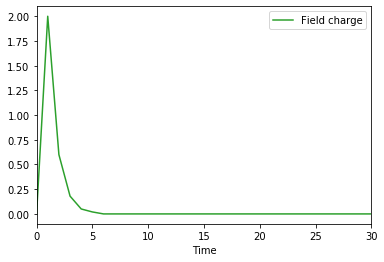

In [5]:
cyberemotions.VALENCE_START, cyberemotions.AROUSAL_START = cyberemotions.VALENCE_B, cyberemotions.AROUSAL_B

cyberemotions.start_simulation(30,False,False,[35,15],None)

#### #03: Expression, no stochasticity, positive initial and negative additional stimuli

In contrast to the previous run, the agent is no able to express its emotions to the field when its arousal threshold is met. The first input is positive and strong enougt to trigger an emotional expression, while the second input is weaker and rather illustrates how the agent reacts to multiple stimuli.

Since the arousal threshold of the agent is triggered and an emotion was expressed, the immediate relaxation of valence and arousal after one time step is significantly larger, compared to the second stimulus which causes no expression. The one expression of the agent also does not cause a significant change in the field charge.

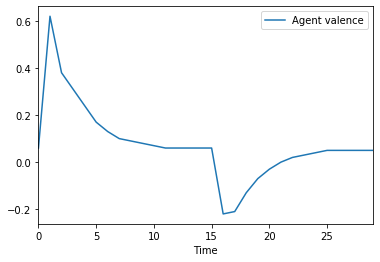

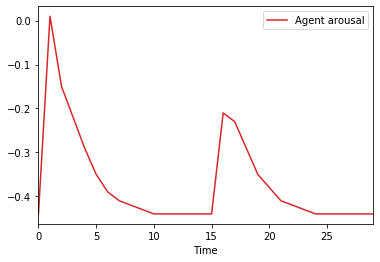

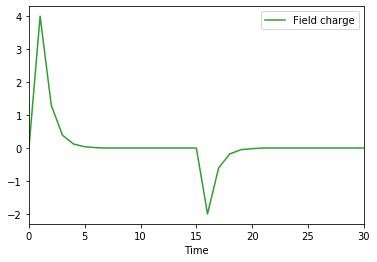

In [6]:
cyberemotions.start_simulation(30,True,False,[45,5],[15,35])

#### #04: Expression, stochasticity, positive initial and negative additional stimuli

Stochastic shocks are now added to the simulation, using a randomly drawn number of a uniform distribution of numbers between `-1`and `1`. The plots below indicate that even a field charge that alone would not be enough to trigger the arousal threshold of an agent, can cause an emotion expression when the circumstances (the strength of the stochastic shock) are right.

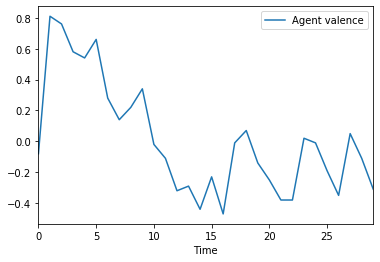

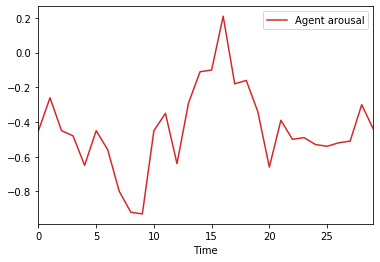

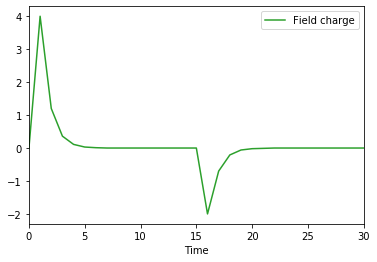

In [8]:
cyberemotions.start_simulation(30,True,True,[45,5],[15,35])

#### #05: Changed decay paramaters: no expression, no stochasticity, positive initial stimulus

This run uses the changed valence and arousal decay paramaters:

| Parameter | Short | Value | Constant
|---|---|---|---|
| Valence decay | &gamma;<sub>v</sub> | 0.007 | VALENCE_DECAY |
| Arousal decay | &gamma;<sub>a</sub> | 0.0105 | AROUSAL_DECAY |

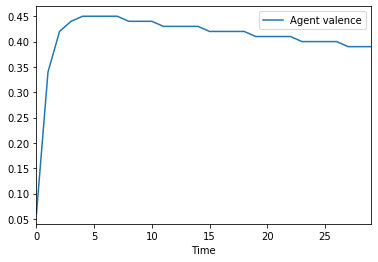

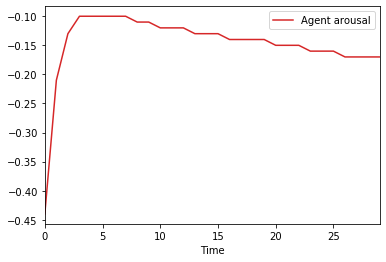

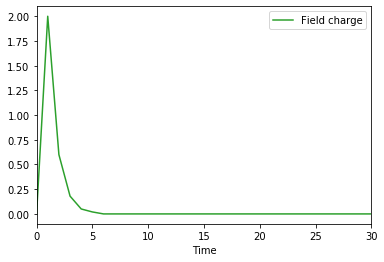

In [9]:
cyberemotions.VALENCE_DECAY = 0.007
cyberemotions.AROUSAL_DECAY = 0.0105

cyberemotions.start_simulation(30,False,False,[35,15],None)

#### #06: Changed decay paramaters: expression, no stochasticity, positive initial stimulus

Using the changed decay paramaters, the expression mechanism is now implemented as well.

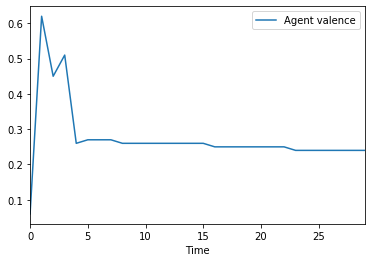

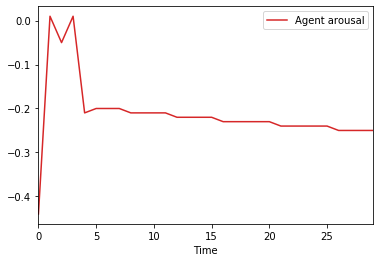

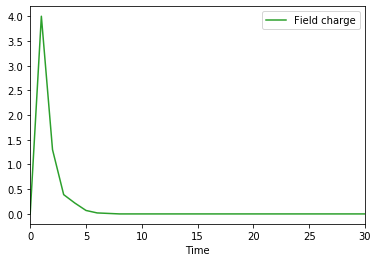

In [10]:
cyberemotions.start_simulation(30,True,False,[45,5],None)